### P-value e IC dos atributos do modelo

* Para verificar o P-value e IC dos atributos selecionados do modelo, consulte o arquivo `atributos_modelo_IC_P-value.csv` na pasta `05_modelo_saida`.

* Os atributos `daily_time_spent_on_site`, `area_income` e `daily_internet_usage` possuem coeficientes negativos. Isso indica que, caso esses atributos independentes cresçam, a probabilidade de clique em anúncio diminui.

* Os atributos `age` e `country` possuem coeficientes positivos. Isso indica que, caso esses atributos independentes cresçam, a probabilidade de clique em anúncio aumenta.


| Dep. Variable: | clicked_on_ad |
|----------------|---------------|
| No. Observations: | 66497 |
| Model: | Logit |
| Df Residuals: | 66492 |
| Method: | MLE |
| Df Model: | 4 |
| Date: | Sun, 10 Dec 2023 |
| Pseudo R-squ.: | 0.3929 |
| Time: | 21:32:34 |
| Log-Likelihood: | -27057. |
| converged: | True |
| LL-Null: | -44568. |
| Covariance Type: | nonrobust |
| LLR p-value: | 0.000 |
| coef | std err | z | P>|z| | [0.025 | 0.975] |
|------|---------|----|-------|--------|--------|
| x1 | -6.9971 | 0.085 | -82.546 | 0.000 | -7.163 | -6.831 |
| x2 | 1.4163 | 0.044 | 32.235 | 0.000 | 1.330 | 1.502 |
| x3 | -2.8665 | 0.074 | -38.925 | 0.000 | -3.011 | -2.722 |
| x4 | -8.9352 | 0.097 | -91.733 | 0.000 | -9.126 | -8.744 |
| x5 | 10.3188 | 0.094 | 109.853 | 0.000 | 10.135 | 10.503 |




In [1]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre processamento do modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modelos
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# resultado do modelo
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [12]:
df = pd.read_csv('../01_pre_process/advertising_clean.csv', index_col=[0])
X = df.drop(columns=['ad_topic_line', 'city',
                     'timestamp', 'clicked_on_ad', 'male'])
y = df['clicked_on_ad']

# Criar amostras de treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Criar pipe_n e pipe_cat
pipe_n = Pipeline([('scaler', MinMaxScaler())])
pipe_cat = Pipeline([('target', TargetEncoder())])

# Selecionar coluna num, cat
col_n = X_train.select_dtypes(['float64', 'int64']).columns
col_cat = X_train.select_dtypes('object').columns

In [13]:
pre_processador = ColumnTransformer([('trans_num', pipe_n, col_n),
                                     ('trans_cat', pipe_cat, col_cat)])

In [18]:
X_train = pre_processador.fit_transform(X_train,y_train)
X_test = pre_processador.transform(X_test)

In [15]:
modelo = sm.Logit(y_train, X_train)
resultado = modelo.fit(method = 'lbfgs')

In [16]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          clicked_on_ad   No. Observations:                66497
Model:                          Logit   Df Residuals:                    66492
Method:                           MLE   Df Model:                            4
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.3929
Time:                        09:33:51   Log-Likelihood:                -27057.
converged:                       True   LL-Null:                       -44568.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.9971      0.085    -82.546      0.000      -7.163      -6.831
x2             1.4163      0.044     32.235      0.000       1.330       1.502
x3            -2.8665      0.074    -38.925      0.000      -3.011      -2.722
x4            -8.9352      0.097    -91.733      0.000      -9.126      -8.744
x5            10.3188      0.094    109.853      0.000      10.135      10.503
==============================================================================
"""

In [ ]:
with open('atributos_modelo_IC_P-value.csv', 'w') as f:
    f.write(resultado.summary().as_csv())

In [ ]:
pd.DataFrame(X)

### Modelo regressão logit (sklearn)
#### Metricas do modelo otimizado:

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| 0            | 0.77      | 0.71   | 0.74     | 6540    |
| 1            | 0.82      | 0.86   | 0.84     | 10085   |
| accuracy     |           |        | 0.80     | 16625   |
| macro avg    | 0.80      | 0.79   | 0.79     | 16625   |
| weighted avg | 0.80      | 0.80   | 0.80     | 16625   |



In [21]:
df = pd.read_csv('../01_pre_process/advertising_clean.csv', index_col=[0])
X = df.drop(columns=['ad_topic_line', 'city',
                     'timestamp', 'clicked_on_ad', 'male'])
y = df['clicked_on_ad']

# Criar amostras de treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Criar pipe_n e pipe_cat
pipe_n = Pipeline([('scaler', MinMaxScaler())])
pipe_cat = Pipeline([('target', TargetEncoder())])

# Selecionar coluna num, cat
col_n = X_train.select_dtypes(['float64', 'int64']).columns
col_cat = X_train.select_dtypes('object').columns

In [22]:
pipeline = Pipeline([('pre_processador', pre_processador),
                     ('modelo', LogisticRegression(random_state=42, solver= 'lbfgs', penalty= 'l2', multi_class= 'auto', class_weight=None))])


In [23]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('pre_processador',
                 ColumnTransformer(transformers=[('trans_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage'],
      dtype='object')),
                                                 ('trans_cat',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  Index(['country'], dtype='object'))])),
                ('modelo', LogisticRegression(random_state=42))])

In [24]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      6540
           1       0.82      0.86      0.84     10085

    accuracy                           0.80     16625
   macro avg       0.80      0.79      0.79     16625
weighted avg       0.80      0.80      0.80     16625



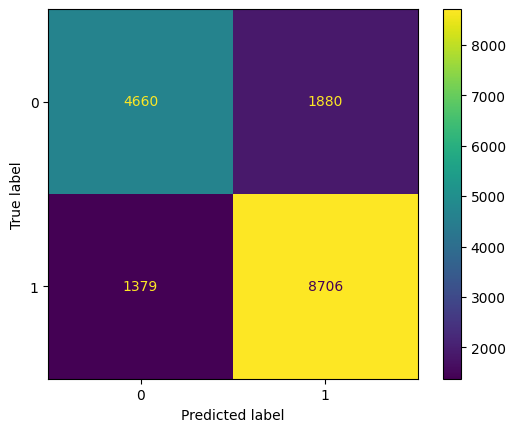

In [11]:
cfs = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(cfs)
display.plot()